## Cle Elum Ridge (CER) Treatment Manuscript Scripts 
## `9_canopy_cover_type` 
### Calculate canopy cover type (understory vegetation)

Notebook contents 
* Calculate the type of canopy cover on Cle Elum Ridge by determining thresholds for the type of vegetation by height

created by Cassie Lumbrazo\
last updated: June 2024\
run location: locally\
python environment: **raster**

In [2]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import geopandas as gpd

import scipy

In [3]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [4]:
# Paths for local machine
ds = xr.open_dataset('C:\\Users\\Lumbr\\OneDrive - UW/Documents\\Washington\\EasternCascades\\Python\\CER_treatment_manuscript\\cer_treatment_region_dataset_all_variables.nc') 

c:\Users\Lumbr\miniconda3\envs\raster\lib\site-packages\xarray\backends\plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified module could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
ds

<xarray.Dataset>
Dimensions:                           (x: 2564, y: 1388, band: 1)
Coordinates:
  * x                                 (x) float64 4.65e+05 ... 4.676e+05
  * y                                 (y) float64 2.111e+05 ... 2.097e+05
  * band                              (band) int32 1
    spatial_ref                       int32 ...
Data variables: (12/339)
    chmws_rapid                       (band, y, x) float32 ...
    dce_rapid                         (band, y, x) float32 ...
    giulia_dce_rapid                  (band, y, x) float32 ...
    giulia_dce_ncalm                  (band, y, x) float32 ...
    baf_old                           (band, y, x) float32 ...
    baf_new                           (band, y, x) float32 ...
    ...                                ...
    hs_rapid_baf_new_100s_n           (band, y, x) float32 ...
    hs_rapid_baf_new_30s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_60s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_80s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_90s_s            (band, y, x) float32 ...
    hs_rapid_baf_new_100s_s           (band, y, x) float32 ...

Define Constants

In [6]:
colorpre='darkslategray'
colorpos='royalblue'
# colorpos='mediumvioletred'

colorsouth = 'darkorange'
colornorth = 'darkblue'

## Okay, new code here... 
let's consider "type" of canopy cover with different classificatons
such as,
* shrubs: 2-5m 
* trees: > 5 m 


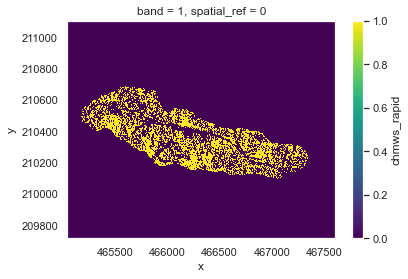

In [10]:
canopy_mask = ds['chmws_rapid'] > 5
canopy_mask.plot()

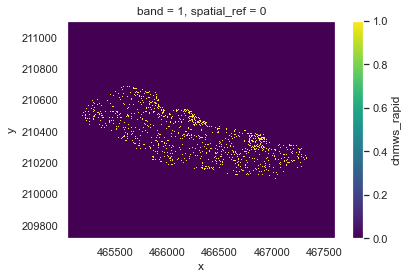

In [12]:
shrub_mask = (ds['chmws_rapid'] > 2) & (ds['chmws_rapid'] <= 5)
shrub_mask.plot()

In [13]:
# Initialize the DataFrame
df = pd.DataFrame(columns=['BAF', 'shrub_cover', 'canopy_cover'])
df['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    shrub_threshold_min = 2
    shrub_threshold_max = 5

    # Determine the shrub grid cells
    shrub_mask = (ds['chmws_rapid'] > 2) & (ds['chmws_rapid'] <= 5)

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    # percentage_shrub_cover = np.clip((total_shrub_cells / total_treatment_cells) * 100, 0, 100) # but that is not solving the problem of % > 100
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'shrub_cover'] = percentage_shrub_cover.values.astype(int)
    
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 5

    # Determine the canopy grid cells
    canopy_mask = ds['chmws_rapid'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = np.round((total_canopy_cells / total_treatment_cells) * 100)

    # Update the DataFrame with the percentage of canopy cover
    df.at[index, 'canopy_cover'] = percentage_canopy_cover.values.astype(int)
    
# Print the DataFrame
print(df)

    BAF shrub_cover canopy_cover
0     1          28           36
1     2           4           91
2    17          14           15
3    30           8           26
4    32          12           46
5    38           7           38
6    60           9           43
7    69           7           49
8    80          10           42
9    82           9           56
10   90           5           53
11  140          10           57
12  150           1           98
13  155           6           86


In [15]:
# Now, if anyhting in the dataframe is a float, change it to an integer
df = df.astype(int)

In [16]:
# change the value of df['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df['BAF'] = df['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df = df.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

df.head()

,BAF,shrub_cover,canopy_cover
0,leave gap,28,36
2,BAF 17,14,15
3,BAF 30,8,26
4,BAF 32,12,46
5,BAF 38,7,38


In [17]:
# Make df into a tidy dataframe with shrub_cover and canopy_cover as strings in new variable with values together for plotting
df_tidy = pd.melt(df, id_vars=['BAF'], value_vars=['shrub_cover', 'canopy_cover'], var_name='cover_type', value_name='cover')
df_tidy.head()

,BAF,cover_type,cover
0,leave gap,shrub_cover,28
1,BAF 17,shrub_cover,14
2,BAF 30,shrub_cover,8
3,BAF 32,shrub_cover,12
4,BAF 38,shrub_cover,7


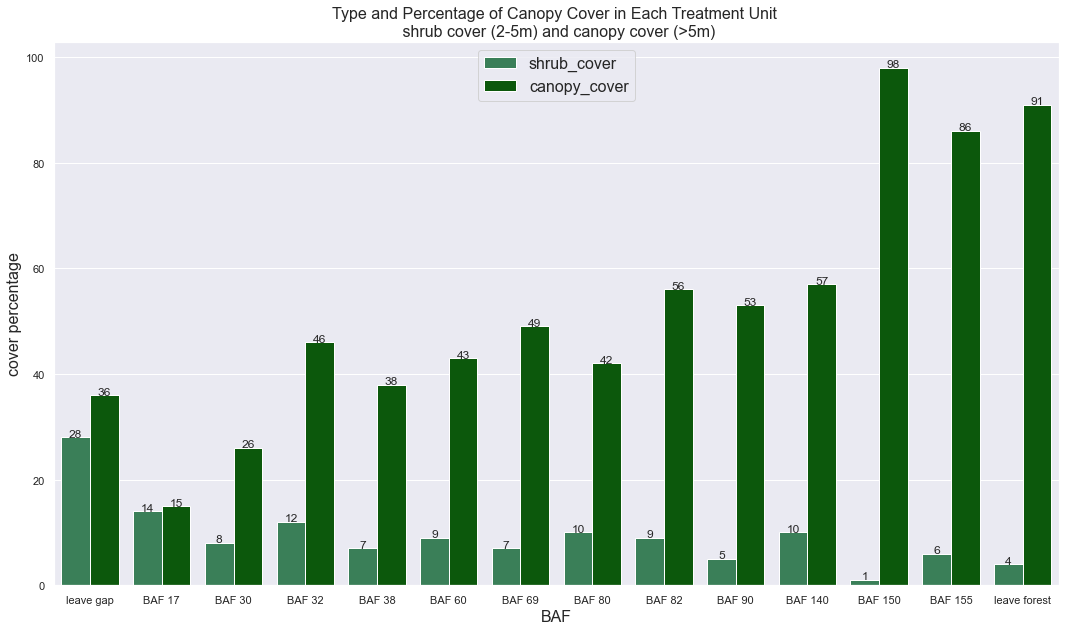

In [18]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['seagreen', 'darkgreen']

# Create a barplot with values
barplot = sns.barplot(data=df_tidy, x='BAF', y='cover', hue='cover_type', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF', fontsize=16)
plt.ylabel('cover percentage', fontsize=16)
plt.title('Type and Percentage of Canopy Cover in Each Treatment Unit \n shrub cover (2-5m) and canopy cover (>5m)', fontsize=16)

plt.legend(loc='upper center', fontsize=16)

plt.show()

### Now, do the same calculations before the treatments

In [23]:
# Initialize the DataFrame
df_pre = pd.DataFrame(columns=['BAF', 'shrub_cover', 'canopy_cover'])
df_pre['BAF'] = [1, 2, 17, 30, 32, 38, 60, 69, 80, 82, 90, 140, 150, 155]

# Loop through the BAF values and calculate the percentage of canopy cover
for index, row in df_pre.iterrows():
    BAF = row['BAF']
    
    # Define the canopy cover threshold
    shrub_threshold_min = 2
    shrub_threshold_max = 5

    # Determine the shrub grid cells
    shrub_mask = (ds['chm_snowoff'] > 2) & (ds['chm_snowoff'] <= 5)

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_shrub_cells = np.sum(shrub_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    # percentage_shrub_cover = np.clip((total_shrub_cells / total_treatment_cells) * 100, 0, 100) # but that is not solving the problem of % > 100
    percentage_shrub_cover = (total_shrub_cells / total_treatment_cells) * 100

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'shrub_cover'] = percentage_shrub_cover.values.astype(int)
    
    
    # Now, do the same thing for a canopy threshold of 3 meters 
    canopy_threshold = 5

    # Determine the canopy grid cells
    canopy_mask = ds['chm_snowoff'] > canopy_threshold

    # Calculate the total number of canopy grid cells in the forest treatment area
    treatment_area = ds['baf'].where(ds['baf'] == BAF)
    total_canopy_cells = np.sum(canopy_mask * treatment_area)

    # Calculate the total number of grid cells in the forest treatment area
    total_treatment_cells = np.sum(treatment_area)

    # Calculate the percentage of canopy cover
    percentage_canopy_cover = np.round((total_canopy_cells / total_treatment_cells) * 100)

    # Update the DataFrame with the percentage of canopy cover
    df_pre.at[index, 'canopy_cover'] = percentage_canopy_cover.values.astype(int)
    
# Print the DataFrame
print(df_pre)

    BAF shrub_cover canopy_cover
0     1          40           15
1     2           7           91
2    17          30           10
3    30          11           23
4    32           7           88
5    38           4           91
6    60          10           73
7    69          13           67
8    80          11           87
9    82           8           82
10   90           5           93
11  140          13           62
12  150           0           99
13  155          10           83


In [24]:
# change the type to integer for all columns 
df_pre = df_pre.astype(int)

In [25]:
# change the value of df_pre['baf'] 1 to 'leave gap' and 2 to 'leave forest'
df_pre['BAF'] = df_pre['BAF'].replace({1: 'leave gap', 2: 'leave forest', 17: 'BAF 17', 30: 'BAF 30', 32: 'BAF 32', 38: 'BAF 38', 
                                       60: 'BAF 60', 69: 'BAF 69', 80: 'BAF 80', 82: 'BAF 82', 90: 'BAF 90', 140: 'BAF 140', 150: 'BAF 150', 155: 'BAF 155'})

# move the leave forest to the last place in the dataframe
df_pre = df_pre.reindex([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1])

# Make df_pre into a tidy dataframe with shrub_cover and canopy_cover as strings in new variable with values together for plotting
df_pre_tidy = pd.melt(df_pre, id_vars=['BAF'], value_vars=['shrub_cover', 'canopy_cover'], var_name='cover_type', value_name='cover')
df_pre_tidy.head()

,BAF,cover_type,cover
0,leave gap,shrub_cover,40
1,BAF 17,shrub_cover,30
2,BAF 30,shrub_cover,11
3,BAF 32,shrub_cover,7
4,BAF 38,shrub_cover,4


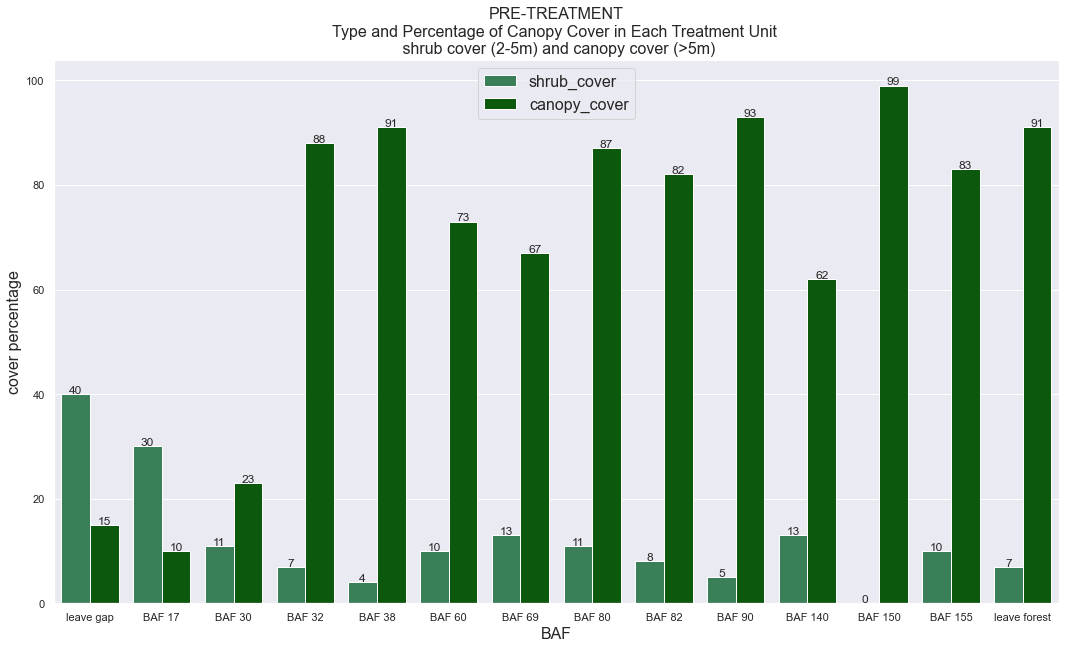

In [26]:
fig = plt.figure(figsize=(18, 10))
color = 'forestgreen'
palette = ['seagreen', 'darkgreen']

# Create a barplot with values
barplot = sns.barplot(data=df_pre_tidy, x='BAF', y='cover', hue='cover_type', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('BAF', fontsize=16)
plt.ylabel('cover percentage', fontsize=16)
plt.title('PRE-TREATMENT\nType and Percentage of Canopy Cover in Each Treatment Unit \n shrub cover (2-5m) and canopy cover (>5m)', fontsize=16)

plt.legend(loc='upper center', fontsize=16)

plt.show()

In [27]:
df

,BAF,shrub_cover,canopy_cover
0,leave gap,28,36
2,BAF 17,14,15
3,BAF 30,8,26
4,BAF 32,12,46
5,BAF 38,7,38
6,BAF 60,9,43
7,BAF 69,7,49
8,BAF 80,10,42
9,BAF 82,9,56
10,BAF 90,5,53


In [28]:
df_pre

,BAF,shrub_cover,canopy_cover
0,leave gap,40,15
2,BAF 17,30,10
3,BAF 30,11,23
4,BAF 32,7,88
5,BAF 38,4,91
6,BAF 60,10,73
7,BAF 69,13,67
8,BAF 80,11,87
9,BAF 82,8,82
10,BAF 90,5,93


In [29]:
df_pos = df.copy(deep=True)

In [30]:
df_pos

,BAF,shrub_cover,canopy_cover
0,leave gap,28,36
2,BAF 17,14,15
3,BAF 30,8,26
4,BAF 32,12,46
5,BAF 38,7,38
6,BAF 60,9,43
7,BAF 69,7,49
8,BAF 80,10,42
9,BAF 82,9,56
10,BAF 90,5,53


In [38]:
# Now merge df_pos and df_pre and create a new column to determine pre and pos 
df_pre['treatment'] = 'WY2021 before treatments'
df_pos['treatment'] = 'WY2023 after treatments'

df_all = pd.concat([df_pre, df_pos])

df_all.head()

,BAF,shrub_cover,canopy_cover,treatment
0,leave gap,40,15,WY2021 before treatments
2,BAF 17,30,10,WY2021 before treatments
3,BAF 30,11,23,WY2021 before treatments
4,BAF 32,7,88,WY2021 before treatments
5,BAF 38,4,91,WY2021 before treatments


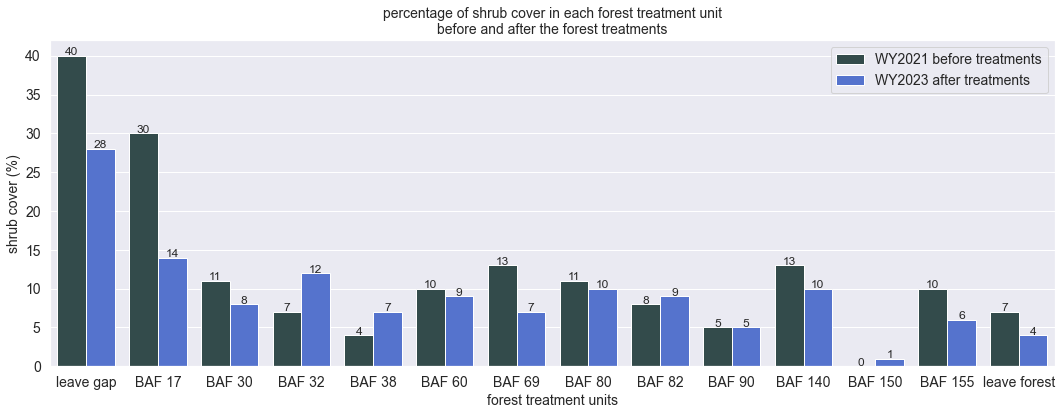

In [39]:
fig = plt.figure(figsize=(18, 6))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df_all, x='BAF', y='shrub_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('shrub cover (%)', fontsize=fontsize_num)
plt.title('percentage of shrub cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper right', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

plt.show()

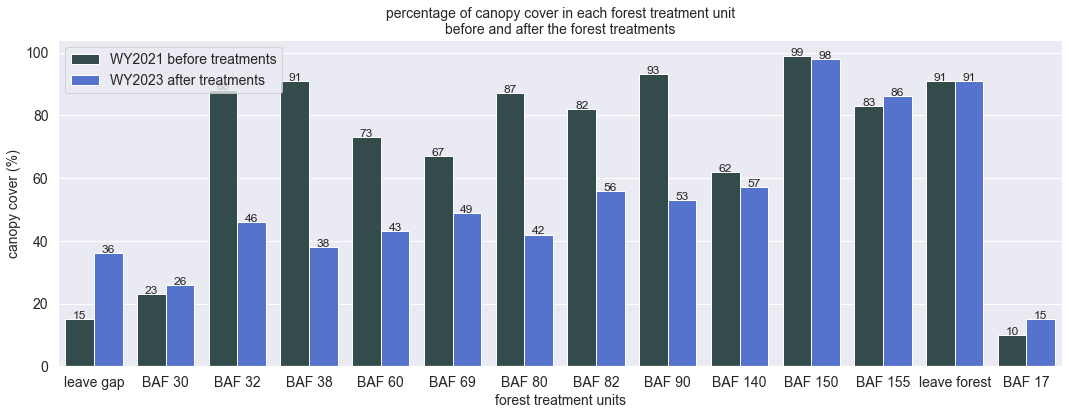

In [32]:
fig = plt.figure(figsize=(18, 6))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df_all, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# # change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
# plt.gca().yaxis.set_label_position("right")
# plt.gca().yaxis.tick_right()

plt.show()

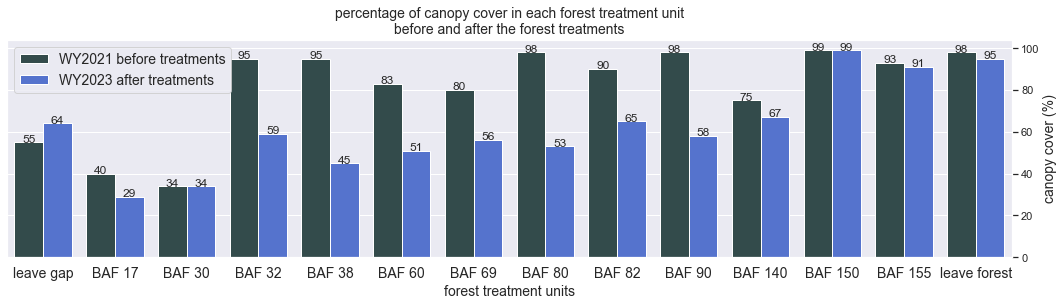

In [82]:
fig = plt.figure(figsize=(18, 4))
palette = [colorpre, colorpos]

fontsize_num = 14

# Create a barplot with values
barplot = sns.barplot(data=df2_all_fix, x='BAF', y='canopy_cover', hue='treatment', palette=palette)

# Add values on top of each bar
for p in barplot.patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2., 
             height + 0.1, 
             '{:1.0f}'.format(height), 
             ha="center")

# Customize the layout
plt.xlabel('forest treatment units', fontsize=fontsize_num)
plt.ylabel('canopy cover (%)', fontsize=fontsize_num)
plt.title('percentage of canopy cover in each forest treatment unit\nbefore and after the forest treatments', fontsize=fontsize_num)
plt.legend(loc='upper left', fontsize=fontsize_num)

# increase the size of the xtick labels
plt.xticks(fontsize=fontsize_num)

# change the ylabel to be on the right side of the figure instead 
plt.yticks(fontsize=fontsize_num)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.show()